<a href="https://colab.research.google.com/github/udit-amin/CNN/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ResNet50
Udit Amin - 200968132


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import MaxPooling2D

### Downloading Dataset

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-23 13:59:58--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.188.208, 142.251.33.208, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.188.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   174MB/s    in 0.4s    

2022-08-23 13:59:58 (174 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



### Extracting and Preparing data

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
org = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(org, 'train')
validation_dir = os.path.join(org, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [ ]:
val_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dogs_dir = os.listdir(train_dogs_dir)

In [ ]:
print(train_cat_fnames)

['cat.558.jpg', 'cat.350.jpg', 'cat.127.jpg', 'cat.247.jpg', 'cat.30.jpg', 'cat.648.jpg', 'cat.753.jpg', 'cat.819.jpg', 'cat.728.jpg', 'cat.81.jpg', 'cat.166.jpg', 'cat.771.jpg', 'cat.960.jpg', 'cat.976.jpg', 'cat.924.jpg', 'cat.476.jpg', 'cat.244.jpg', 'cat.346.jpg', 'cat.177.jpg', 'cat.524.jpg', 'cat.408.jpg', 'cat.517.jpg', 'cat.718.jpg', 'cat.262.jpg', 'cat.147.jpg', 'cat.214.jpg', 'cat.206.jpg', 'cat.438.jpg', 'cat.675.jpg', 'cat.201.jpg', 'cat.720.jpg', 'cat.593.jpg', 'cat.3.jpg', 'cat.125.jpg', 'cat.758.jpg', 'cat.954.jpg', 'cat.537.jpg', 'cat.705.jpg', 'cat.23.jpg', 'cat.670.jpg', 'cat.73.jpg', 'cat.809.jpg', 'cat.566.jpg', 'cat.274.jpg', 'cat.803.jpg', 'cat.340.jpg', 'cat.859.jpg', 'cat.363.jpg', 'cat.434.jpg', 'cat.412.jpg', 'cat.336.jpg', 'cat.112.jpg', 'cat.271.jpg', 'cat.488.jpg', 'cat.287.jpg', 'cat.667.jpg', 'cat.805.jpg', 'cat.640.jpg', 'cat.847.jpg', 'cat.903.jpg', 'cat.209.jpg', 'cat.739.jpg', 'cat.597.jpg', 'cat.392.jpg', 'cat.564.jpg', 'cat.600.jpg', 'cat.968.jpg', 

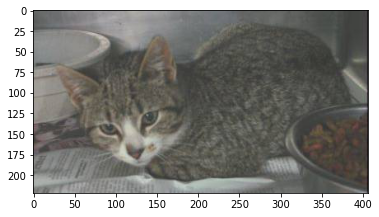

In [ ]:
plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

### Importing Models

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.inception_v3 import InceptionV3
from keras.applications.efficientnet import EfficientNetB0

#### AlexNet

In [ ]:
alexnet=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')    
])

In [ ]:
alexnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 128)       46592     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       819456    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
alexnet.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.1), metrics=['acc'])

In [ ]:
history = alexnet.fit(train_generator, epochs=5, validation_data=val_generator)

Epoch 1/5
100/100 [==============================] - 23s 108ms/step - loss: 2801.8245 - acc: 0.4915 - val_loss: 4294.8213 - val_acc: 0.5020
Epoch 2/5
100/100 [==============================] - 10s 104ms/step - loss: 0.7698 - acc: 0.4870 - val_loss: 2.2467 - val_acc: 0.5010
Epoch 3/5
100/100 [==============================] - 10s 104ms/step - loss: 0.9581 - acc: 0.5115 - val_loss: 1.0457 - val_acc: 0.5000
Epoch 4/5
100/100 [==============================] - 11s 111ms/step - loss: 0.7943 - acc: 0.4915 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/5
100/100 [==============================] - 10s 104ms/step - loss: 0.6971 - acc: 0.5130 - val_loss: 0.7010 - val_acc: 0.5010


#### VGG16

In [ ]:
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
vgg.trainable = False
vgg.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
VGG = tf.keras.Sequential([
    vgg,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])
VGG.summary()

VGG.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


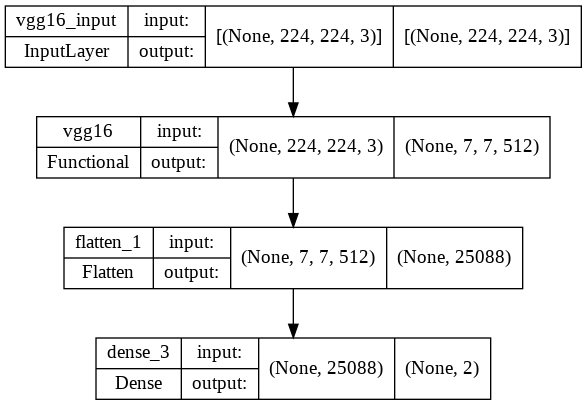

In [ ]:
plot_model(VGG,  show_shapes=True, show_layer_names=True)

#### ResNet50

In [ ]:
resnet50 = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
resnet50.trainable = False
resnet50.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
ResNet = tf.keras.Sequential([
    resnet50,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])
ResNet.summary()

ResNet.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


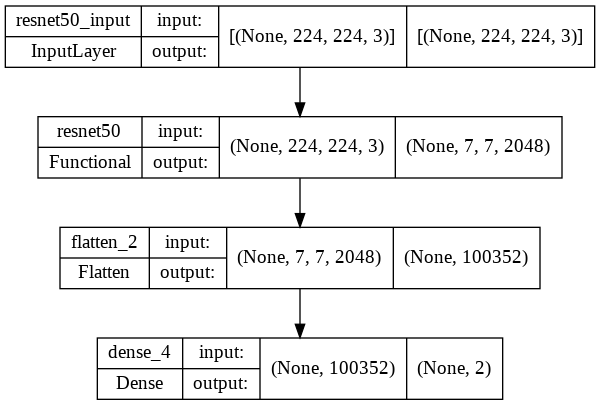

In [ ]:
plot_model(ResNet,  show_shapes=True, show_layer_names=True)

#### InceptionV3

In [ ]:
googlenet = InceptionV3(input_shape=(229,229,3), weights='imagenet', include_top=False)
googlenet.trainable = False
googlenet.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 229, 229, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 114, 114, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 114, 114, 32  96         ['conv2d_5[0][0]']               
 rmalization)         

In [ ]:
Inception = tf.keras.Sequential([
    googlenet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])
Inception.summary()

Inception.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_5 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


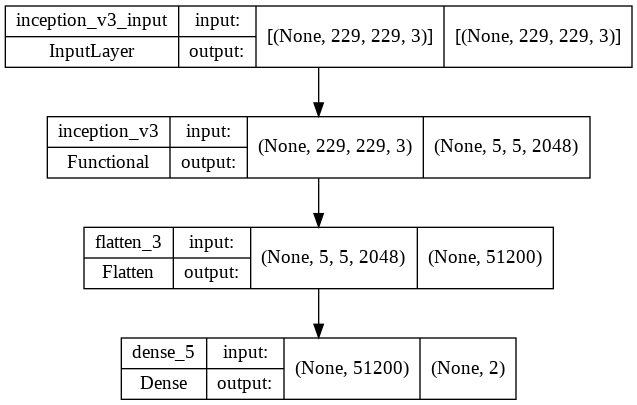

In [ ]:
plot_model(Inception,  show_shapes=True, show_layer_names=True)

#### EfficientNetB0

In [ ]:
efficientnet = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
efficientnet.trainable = False
efficientnet.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [ ]:
ENB0 = tf.keras.Sequential([
    efficientnet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])
ENB0.summary()

ENB0.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_6 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


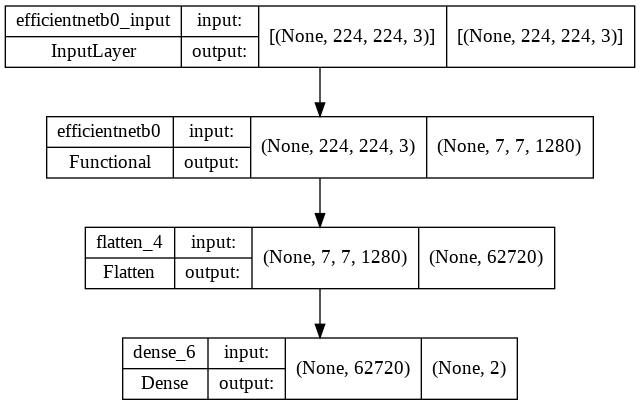

In [ ]:
plot_model(ENB0,  show_shapes=True, show_layer_names=True)

#### MobileNetV2

In [ ]:
mobilenet = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
mobilenet.trainable = False
mobilenet.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [ ]:
MobileNet = tf.keras.Sequential([
    mobilenet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])
MobileNet.summary()

MobileNet.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 dense_7 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


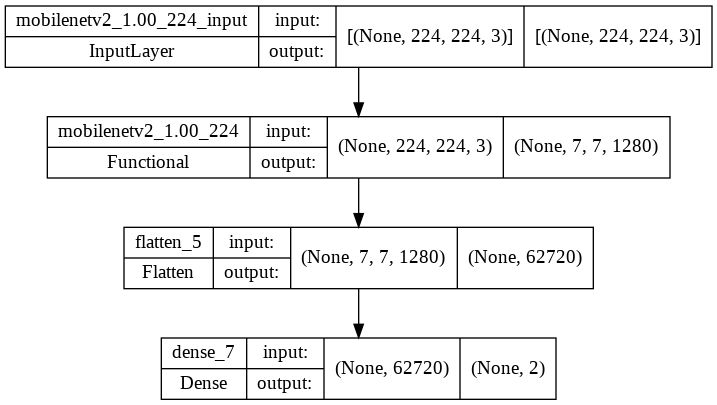

In [ ]:
plot_model(MobileNet,  show_shapes=True, show_layer_names=True)

## Training

In [ ]:
for i in [VGG,Inception,ResNet,ENB0,MobileNet]:
  print("Training for ", str(i))
  history = i.fit(
  train_generator,
      steps_per_epoch=100,
      epochs=4,
      validation_data=val_generator,
      validation_steps=50,
      verbose=1)

Training for  <keras.engine.sequential.Sequential object at 0x7f1140070a90>
Epoch 1/4
100/100 [==============================] - 20s 174ms/step - loss: 0.4989 - acc: 0.7540 - val_loss: 0.3531 - val_acc: 0.8670
Epoch 2/4
100/100 [==============================] - 17s 175ms/step - loss: 0.2925 - acc: 0.8935 - val_loss: 0.2921 - val_acc: 0.8820
Epoch 3/4
100/100 [==============================] - 18s 178ms/step - loss: 0.2291 - acc: 0.9300 - val_loss: 0.2611 - val_acc: 0.8910
Epoch 4/4
100/100 [==============================] - 18s 182ms/step - loss: 0.1879 - acc: 0.9430 - val_loss: 0.2471 - val_acc: 0.9010
Training for  <keras.engine.sequential.Sequential object at 0x7f10ac409490>
Epoch 1/4
100/100 [==============================] - 17s 127ms/step - loss: 0.1061 - acc: 0.9635 - val_loss: 0.0625 - val_acc: 0.9820
Epoch 2/4
100/100 [==============================] - 12s 116ms/step - loss: 0.0132 - acc: 0.9960 - val_loss: 0.0551 - val_acc: 0.9870
Epoch 3/4
100/100 [=========================

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [40]:
!wget --no-check-certificate http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/horse2zebra.zip

--2022-08-23 14:30:36--  http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/horse2zebra.zip
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116867962 (111M) [application/zip]
Saving to: ‘horse2zebra.zip.2’

horse2zebra.zip.2   100%[===================>] 111.45M  1.18MB/s    in 77s     

2022-08-23 14:31:54 (1.44 MB/s) - ‘horse2zebra.zip.2’ saved [116867962/116867962]



In [41]:
local_zip = 'horse2zebra.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [42]:
!mkdir -v horse2zebra/train horse2zebra/validation
!mv -v horse2zebra/testA horse2zebra/testB horse2zebra/validation
!mv -v horse2zebra/trainA horse2zebra/trainB horse2zebra/train

mkdir: created directory 'horse2zebra/train'
mkdir: created directory 'horse2zebra/validation'
renamed 'horse2zebra/testA' -> 'horse2zebra/validation/testA'
renamed 'horse2zebra/testB' -> 'horse2zebra/validation/testB'
renamed 'horse2zebra/trainA' -> 'horse2zebra/train/trainA'
renamed 'horse2zebra/trainB' -> 'horse2zebra/train/trainB'


In [43]:
base_dir = 'horse2zebra'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_horses_dir = os.path.join(train_dir, 'trainA')

train_zebras_dir = os.path.join(train_dir, 'trainB')

validation_horses_dir = os.path.join(validation_dir, 'testA')

validation_zebras_dir = os.path.join(validation_dir, 'testB')

In [44]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [45]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [46]:
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='categorical')

Found 260 images belonging to 2 classes.


In [47]:
train_horses_fnames = os.listdir(train_horses_dir)
print(train_horses_fnames[:10])

train_zebras_fnames = os.listdir(train_zebras_dir)
train_zebras_fnames.sort()
print(train_zebras_fnames[:10])

['n02381460_3664.jpg', 'n02381460_2341.jpg', 'n02381460_2049.jpg', 'n02381460_4117.jpg', 'n02381460_5545.jpg', 'n02381460_155.jpg', 'n02381460_1227.jpg', 'n02381460_1486.jpg', 'n02381460_948.jpg', 'n02381460_4674.jpg']
['n02391049_10007.jpg', 'n02391049_10027.jpg', 'n02391049_1004.jpg', 'n02391049_10047.jpg', 'n02391049_10063.jpg', 'n02391049_101.jpg', 'n02391049_1012.jpg', 'n02391049_10122.jpg', 'n02391049_10123.jpg', 'n02391049_10129.jpg']


In [48]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2,activation='softmax')    
])
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ['acc'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization_99 (Bat  (None, 14, 14, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_100 (Conv2D)         (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_100 (Ba  (None, 7, 7, 256)        1024      
 tchNormalization)                                               
                                                      

In [49]:
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
121/121 [==============================] - 7s 46ms/step - loss: 1.7315 - acc: 0.5473 - val_loss: 2.9198 - val_acc: 0.4769
Epoch 2/5
121/121 [==============================] - 5s 42ms/step - loss: 0.7715 - acc: 0.5777 - val_loss: 0.6807 - val_acc: 0.6500
Epoch 3/5
121/121 [==============================] - 5s 43ms/step - loss: 0.7036 - acc: 0.5381 - val_loss: 0.6880 - val_acc: 0.5385
Epoch 4/5
121/121 [==============================] - 5s 42ms/step - loss: 0.6897 - acc: 0.5473 - val_loss: 0.6923 - val_acc: 0.5385
Epoch 5/5
121/121 [==============================] - 5s 43ms/step - loss: 0.6886 - acc: 0.5556 - val_loss: 0.6902 - val_acc: 0.5385
